In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv(r"./bitcoin_price_Training - Training.csv", parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [53]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [54]:
df.set_index(keys=["Date"], inplace=True, drop=True)
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


<AxesSubplot:xlabel='Date', ylabel='Daily Bitcoin Price from 2013 to 2020'>

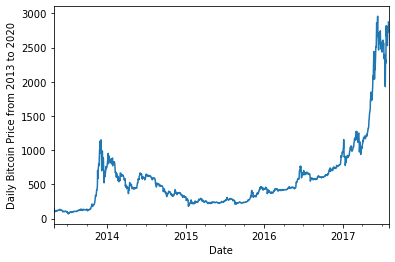

In [55]:
df.Close.plot(ylabel="Daily Bitcoin Price from 2013 to 2020")

<AxesSubplot:xlabel='Date'>

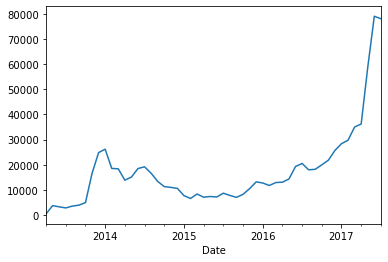

In [56]:
df.resample('M').Close.sum().plot()

<AxesSubplot:xlabel='Date'>

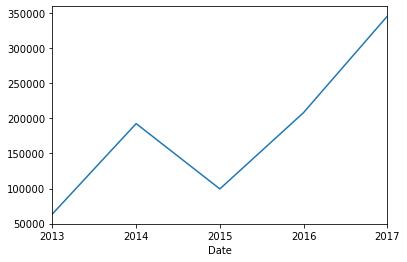

In [57]:
df.resample('Y').Close.sum().plot()

In [58]:
data2 = df.Close
data2.head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [59]:
data2.index.day_of_week

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=1556)

In [60]:
weekday = df.groupby([data2.index.day_of_week]).Close.mean()
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

In [61]:
weekday.index = ["Sun", "Mon", "Tue", "Wed", "Thru", "Fri", "Sat"]
weekday

Sun     588.738655
Mon     582.402658
Tue     581.731216
Wed     585.565135
Thru    583.876622
Fri     584.545180
Sat     582.802511
Name: Close, dtype: float64

<AxesSubplot:>

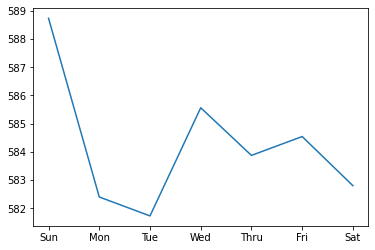

In [62]:
weekday.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

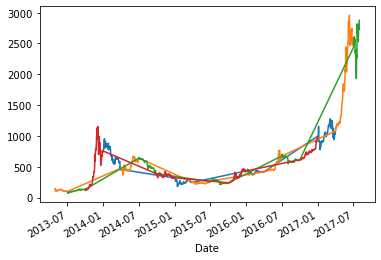

In [63]:
quarters = df.groupby([data2.index.quarter]).Close
quarters.plot()

<AxesSubplot:xlabel='Date'>

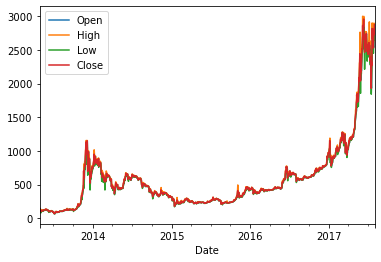

In [64]:
df.plot()

# Analysis Trend By Business Day and Weekends

In [65]:
df["dayofweek"] = df.index.day_of_week
df.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3


In [66]:
def assign_label(feature):
    return "weekday" if feature < 5 else "weekend"

In [67]:
df["dayofweek"] = df.dayofweek.map(assign_label)
df.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",weekend
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",weekday
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",weekday
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",weekday
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",weekday


<AxesSubplot:title={'center':'Weekdays Trends'}, xlabel='Date'>

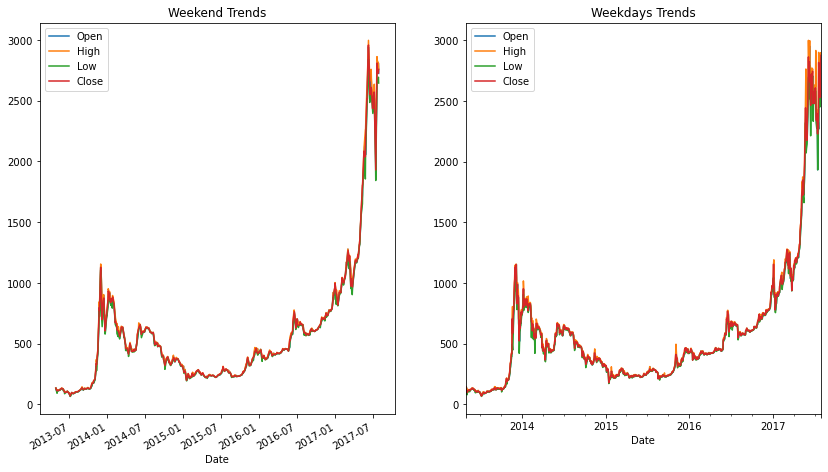

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
df[df.dayofweek == "weekend"].plot(ax=ax[0], title="Weekend Trends")
df[df.dayofweek == "weekday"].plot(ax=ax[1], title="Weekdays Trends")

# Baseline Model (Naive Based)

In [69]:
df["prediction_naive"] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",weekend,NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",weekday,134.21
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",weekday,144.54
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",weekday,139.00
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",weekday,116.99


<AxesSubplot:xlabel='Date'>

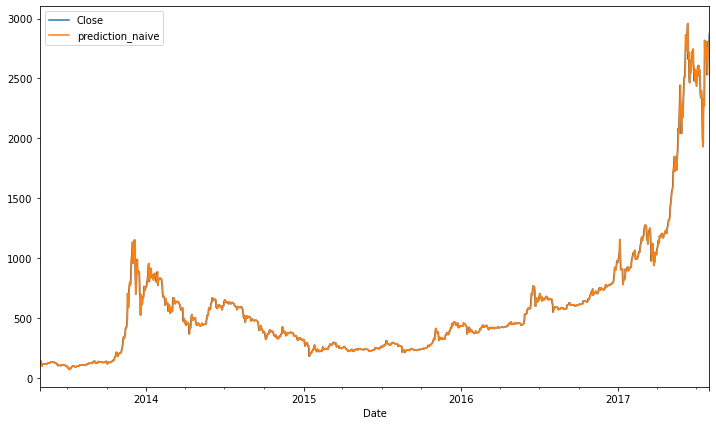

In [70]:
df[["Close", "prediction_naive"]].plot(figsize=(12,7))

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true=df["Close"][1:], y_pred=df["prediction_naive"][1:]))

37.23363264835875

# Detect Seasonality / Stationality in Dataset

**Seasonality**:
*Market manipulation* depends upon some factors in time (E.g. Chishtmas, Pujo, Summer, Vaccation etc.). In this example See the **Peaks** repeating year cycle.

**Stationality**:
If thoughout the dataset timecycle the **Mean and Standard Deviation** almost constant irrespective of time / season / any other factors, this refered as a Stational Dataset.

**Note**:
Always try to adopt the prediction for the dataset type **Stationary Dataset**. Because in the long run while applying any kind of **TimeSeries Analysis Algorithms (E.g. ARIMA, SARIMA, SARIMAX)** would be result a Better Prediction.

To solve this problem - we generally use **Rolling Mean** Methods (like. RollingHash Function). 

An **ARIMA model** is a class of statistical models for analyzing and forecasting time series data. ... ARIMA is an acronym that stands for **AutoRegressive Integrated Moving Average.** It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration

<AxesSubplot:xlabel='Date'>

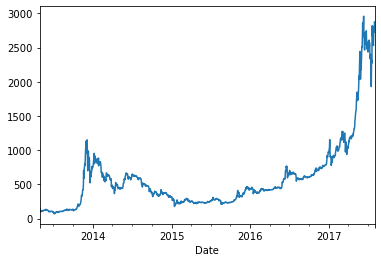

In [72]:
df.Close.plot()

# Rolling Windows: Mean, StandardDeviation

In [73]:
means = df.Close.rolling(window=7).mean()
stds = df.Close.rolling(window=7).std()

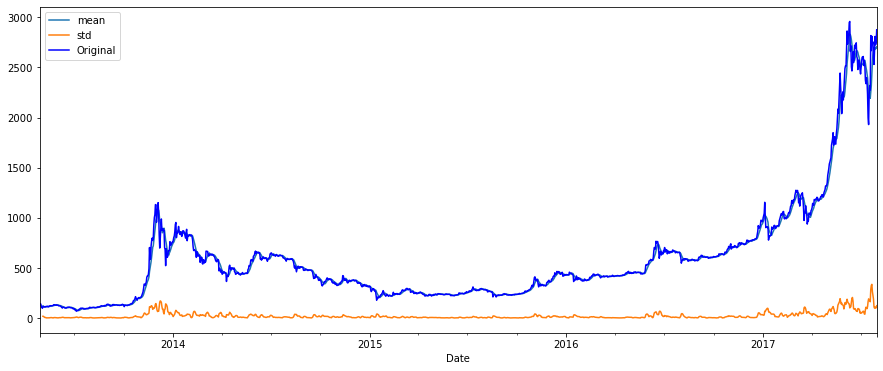

In [74]:
plt.figure(figsize=(15,6))
means.plot(label="mean")
stds.plot(label="std")
df.Close.plot(label="Original", color="b")
plt.legend()

# Detect: Trend is Seasonal / Stationary?
For which we are going to perform **Augmented DickeyFuller Testing** on Dataset.

**Augmented Dickey Fuller test (ADF Test)** is a common statistical test used to test whether a given *Time series is stationary or not*. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

**Note:**
1) the hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error.

2) In general, a p-value of less than 5% means you can reject the null hypothesis that there is a unit root.

3) - If **P-value less than 5%**:
        - Reject Null Hypothesis. **Dataset is Stationary**
   - If **P-value is greater than 5%**
        - Failed To Reject NullHypothesis. Meaning Dataset is non-Stationary. In simple way, **dataset is Seasonal.**
        
4) P-value is some kind of Probablity Distribution Value. Lies 0 to 1 range.

In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
df.Close.isna().sum()

0

In [77]:
results = adfuller(x=df.Close)
labels = ["ADF Statistics", "P-value", "Lags Used", "No. of Observations"]

for v, l in zip(results,labels):
    print(f"{l} : {v}")

ADF Statistics : 2.5355885873886206
P-value : 0.9990604352222925
Lags Used : 24
No. of Observations : 1531


# Test for Stationality Using DickeyFuller Test

In [78]:
def test_for_stationality(feature, df=df):
    means = df[feature].rolling(window=7).mean()
    stds = df[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,6))
    means.plot(label="mean")
    stds.plot(label="std")
    
    df[feature].plot(label="Original", color="b")
    plt.legend()
    
    results = adfuller(x=df[feature].dropna())
    labels = ["ADF Statistics", "P-value", "Lags Used", "No. of Observations"]

    for v, l in zip(results,labels):
        print(f"{l} : {v}")
    
    return "Data is Stationary" if results[1] <= 0.05 else "Data is Non Stationary"
    

# Bitcoins `ClosePrice` AdFuller Test Results

ADF Statistics : 2.5355885873886206
P-value : 0.9990604352222925
Lags Used : 24
No. of Observations : 1531


'Data is Non Stationary'

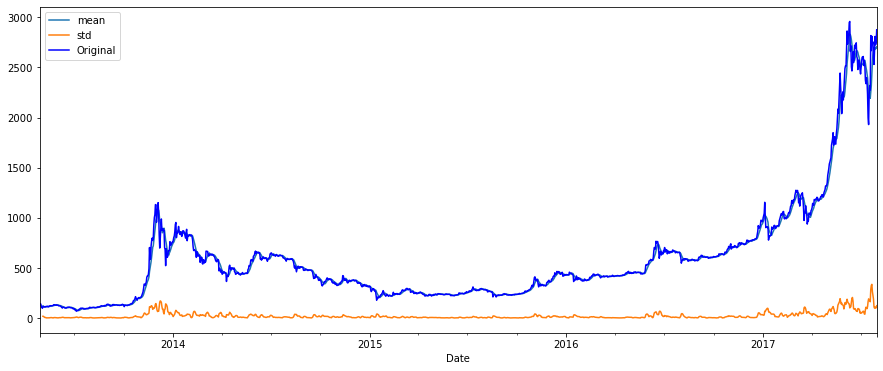

In [79]:
test_for_stationality('Close')

# Convertion to Stationary Data

**Log transformation** is a data transformation method in which it replaces each variable x with a log(x). In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution.

**When To Use**:
The log transformation can be used to make highly skewed distributions less skewed.

`Log Transform` is the most popular method to convert the dataset.

<AxesSubplot:xlabel='Date'>

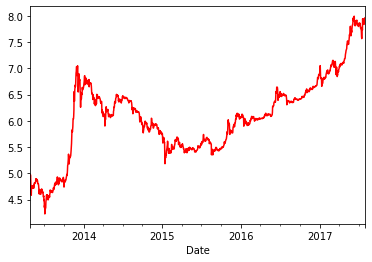

In [80]:
log_transformed_df = np.log(df.Close)
log_transformed_df.plot(color="r")

# Why to use Rolling Log_transformed?

To **Smoothening** our Series. Again concept used - **Moving Average(MA)**. (MA) is extensively used in **Stock Market** analysis.

In [81]:
rolling_mean_ = log_transformed_df - log_transformed_df.shift(7)
rolling_mean_

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
                ...   
2017-07-27   -0.053141
2017-07-28    0.051593
2017-07-29   -0.030227
2017-07-30    0.009760
2017-07-31    0.042804
Name: Close, Length: 1556, dtype: float64

In [82]:
rolling_mean = log_transformed_df.rolling(window=7).mean()
rolling_mean

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
                ...   
2017-07-27    7.891963
2017-07-28    7.899333
2017-07-29    7.895015
2017-07-30    7.896409
2017-07-31    7.902524
Name: Close, Length: 1556, dtype: float64

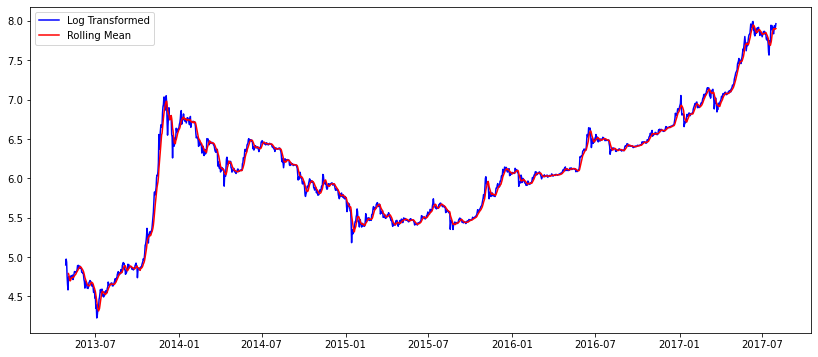

In [83]:
plt.figure(figsize=(14,6))
plt.plot(log_transformed_df, label="Log Transformed", color="b")
plt.plot(rolling_mean, label="Rolling Mean", color="r")
plt.legend()

# See Lr_diff is a Stationary Data Post AdFuller Test

Steps:
1) Perform Log Transformation on Data.
2) Find Rolling Mean (Moving Average) by `df[feature].rolling(window=n).mean()`.
3) test_for_stationality using custom made function.

In [84]:
lr_diff = log_transformed_df - rolling_mean
df["lr_diff"] = lr_diff

ADF Statistics : -7.191325804532465
P-value : 2.4992600031567963e-10
Lags Used : 22
No. of Observations : 1527


'Data is Stationary'

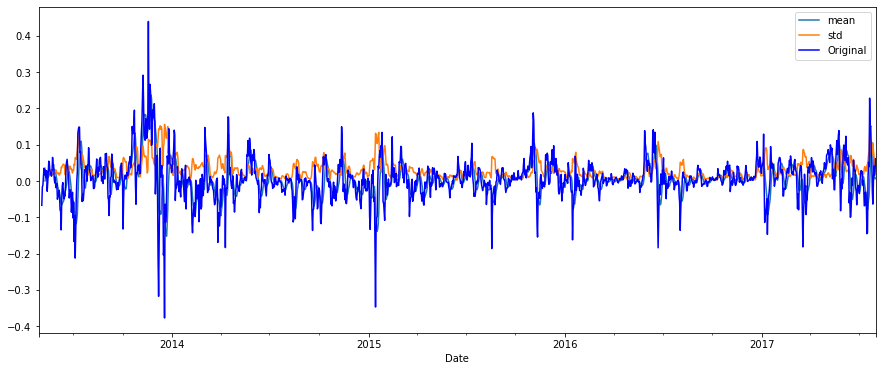

In [85]:
test_for_stationality('lr_diff')

# Using FbProphet Module

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Build by [**Facebook**](https://facebook.github.io/prophet/) itself.

**Notes:**

1. Greatly Handles Irregular Intervals, Holidays in Timeseries Dataset
2. Noise / Outlier Handlers in effienct way

**Good Reads**

1. [ARIMA vs. Prophet: Forecasting](https://towardsdatascience.com/arima-vs-prophet-forecasting-air-passenger-numbers-4e01b2d93608#:~:text=One%20key%20difference%20between%20ARIMA,trend%20in%20the%20time%20series.&text=Prophet%20works%20through%20use%20of,%2C%20weekly%2C%20or%20yearly).)
2. [Time Series Forecasting — ARIMA vs Prophet](https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a)
3. [Time Series With Prophet ML Mastering](https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/)

In [86]:
# !conda install -c conda-forge fbprophet # works
# !pip install fbprophet

In [87]:
from fbprophet import Prophet
model = Prophet()

# Forecasting Next 500 Days Bitcoin Closing Price / Trend

In [88]:
dataset = df[['Close']]
dataset.reset_index(inplace=True)
dataset.columns=['ds', 'y'] # This is mandetory - for Prophet - `ds and y`
dataset.head()

,ds,y
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21


In [89]:
fitted_model = model.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -113.741
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3628.23     0.0335115       1056.34           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3715.66     0.0101665       228.789       0.819       0.819      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3747.26     0.0602088       484.925           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3786.69    0.00105567       324.984      0.5678      0.5678      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3805.35     0.0115936       432.957           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [95]:
future_predictions = fitted_model.make_future_dataframe(periods=500, freq='D', include_history=True)

In [100]:
forecast = fitted_model.predict(future_predictions)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,103.554911,-192.191152,80.083761,103.554911,103.554911,-167.305026,-167.305026,-167.305026,-2.790195,-2.790195,-2.790195,-164.514830,-164.514830,-164.514830,0.0,0.0,0.0,-63.750115
1,2013-04-29,101.056502,-181.856858,83.261544,101.056502,101.056502,-156.854006,-156.854006,-156.854006,1.407918,1.407918,1.407918,-158.261924,-158.261924,-158.261924,0.0,0.0,0.0,-55.797504
2,2013-04-30,98.558093,-191.246407,85.337454,98.558093,98.558093,-149.506172,-149.506172,-149.506172,2.501927,2.501927,2.501927,-152.008099,-152.008099,-152.008099,0.0,0.0,0.0,-50.948079
3,2013-05-01,96.059684,-177.806460,95.101784,96.059684,96.059684,-145.638796,-145.638796,-145.638796,0.089661,0.089661,0.089661,-145.728457,-145.728457,-145.728457,0.0,0.0,0.0,-49.579112
4,2013-05-02,93.561275,-175.610993,88.216265,93.561275,93.561275,-137.189214,-137.189214,-137.189214,2.205180,2.205180,2.205180,-139.394394,-139.394394,-139.394394,0.0,0.0,0.0,-43.627939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2018-12-09,5611.353906,2747.098534,8121.898214,2698.276920,8178.817881,26.503949,26.503949,26.503949,-2.790195,-2.790195,-2.790195,29.294145,29.294145,29.294145,0.0,0.0,0.0,5637.857856
2052,2018-12-10,5617.858194,2694.596933,8246.060527,2696.969085,8195.696646,23.841122,23.841122,23.841122,1.407918,1.407918,1.407918,22.433204,22.433204,22.433204,0.0,0.0,0.0,5641.699317
2053,2018-12-11,5624.362483,2667.944104,8269.356585,2691.297318,8212.575412,17.911193,17.911193,17.911193,2.501927,2.501927,2.501927,15.409266,15.409266,15.409266,0.0,0.0,0.0,5642.273676
2054,2018-12-12,5630.866771,2740.991109,8305.231123,2687.791844,8229.454177,8.400214,8.400214,8.400214,0.089661,0.089661,0.089661,8.310553,8.310553,8.310553,0.0,0.0,0.0,5639.266984


In [102]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2046,2018-12-04,5639.400013,2789.415829,8172.802682
2047,2018-12-05,5638.756403,2737.940746,8182.601980
2048,2018-12-06,5642.051522,2724.239467,8248.720735
2049,2018-12-07,5639.333263,2722.312945,8256.747213
2050,2018-12-08,5638.517990,2740.668183,8232.921651
2051,2018-12-09,5637.857856,2747.098534,8121.898214
2052,2018-12-10,5641.699317,2694.596933,8246.060527
2053,2018-12-11,5642.273676,2667.944104,8269.356585
2054,2018-12-12,5639.266984,2740.991109,8305.231123
2055,2018-12-13,5640.798231,2696.157950,8312.354761


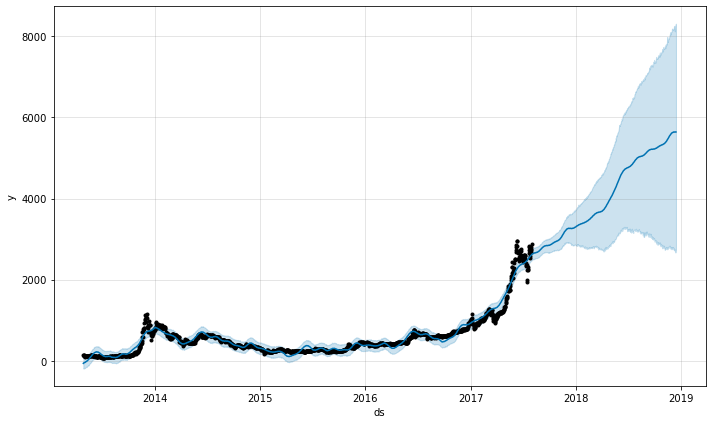

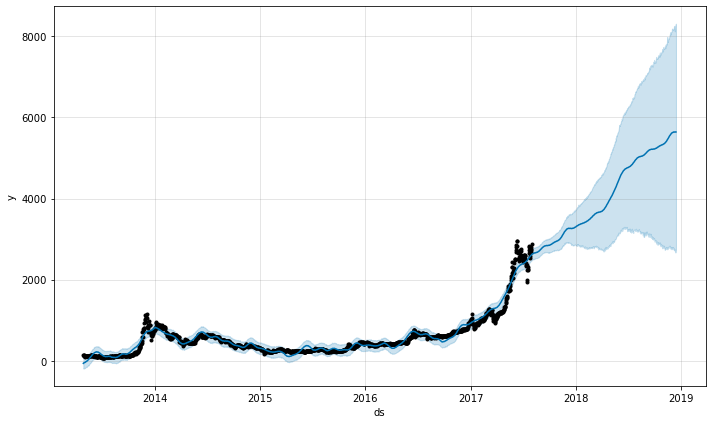

In [104]:
model.plot(forecast)

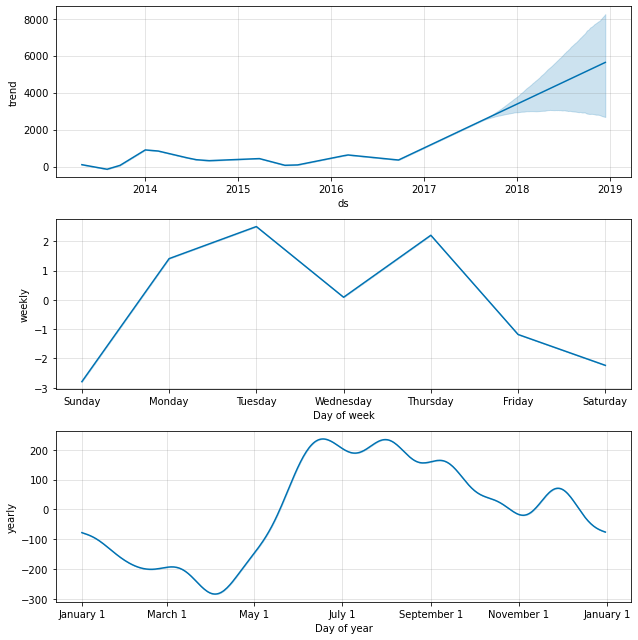

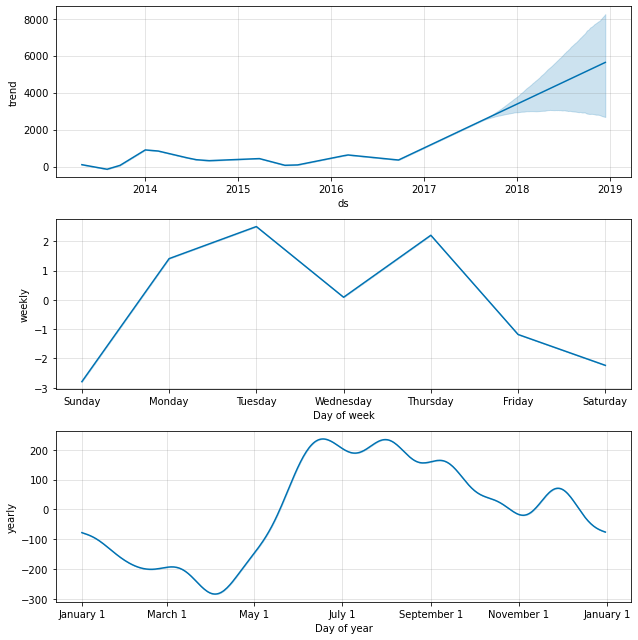

In [107]:
model.plot_components(fcst=forecast)

In [108]:
from fbprophet.diagnostics import cross_validation

In [110]:
cross_validation(model=model, horizon='365 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-07-31 00:00:00 and 2016-07-31 00:00:00
  0%|          | 0/1 [00:00<?, ?it/s]

Initial log joint probability = -26.1633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2364.48     0.0543015       384.711           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     198       2443.12   0.000965444       282.565   8.582e-06       0.001      263  LS failed, Hessian reset 
     199       2443.21   0.000886785        227.19           1           1      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2476.98     0.0235916       600.581      0.7834      0.7834      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2506.83    0.00307662       222.155           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405        2507.7   0.000298689    

100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,689.363749,609.369168,772.662223,606.27,2016-07-31
1,2016-08-02,690.662095,607.039452,764.906529,547.47,2016-07-31
2,2016-08-03,690.073114,602.992560,768.678139,566.36,2016-07-31
3,2016-08-04,690.951709,609.431627,773.120095,578.29,2016-07-31
4,2016-08-05,691.192216,613.478960,768.472665,575.04,2016-07-31
...,...,...,...,...,...,...
360,2017-07-27,1232.407368,570.365752,1838.704053,2671.78,2016-07-31
361,2017-07-28,1233.370785,568.124696,1838.012441,2809.01,2016-07-31
362,2017-07-29,1234.922585,559.567858,1855.037284,2726.45,2016-07-31
363,2017-07-30,1236.593412,572.912553,1866.866943,2757.18,2016-07-31
